In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv("/kaggle/input/3dprinter/data.csv")

In [3]:
dataset.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
dataset["infill_pattern"].unique()

array(['grid', 'honeycomb'], dtype=object)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [7]:
dataset.shape

(50, 12)

<AxesSubplot: xlabel='infill_pattern', ylabel='Count'>

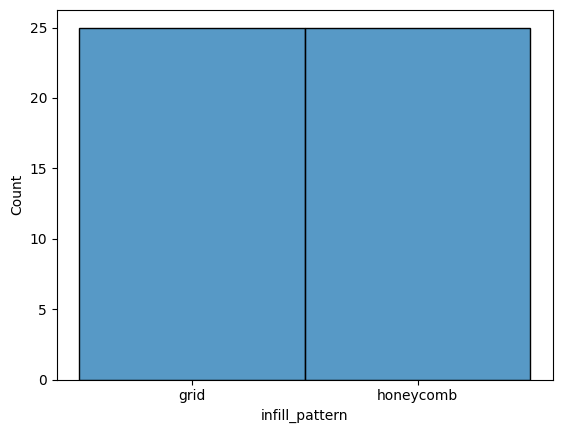

In [8]:
sns.histplot(dataset["infill_pattern"])

In [9]:
x = dataset.drop(["infill_pattern"],axis=1)
y  = dataset["infill_pattern"]
x.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,250,80,40,abs,100,92,5,0.7


In [10]:
x = pd.get_dummies(x)
x.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,material_abs,material_pla
0,0.02,8,90,220,60,40,0,25,18,1.2,1,0
1,0.02,7,90,225,65,40,25,32,16,1.4,1,0
2,0.02,1,80,230,70,40,50,40,8,0.8,1,0
3,0.02,4,70,240,75,40,75,68,10,0.5,1,0
4,0.02,6,90,250,80,40,100,92,5,0.7,1,0


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [12]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
x_test.shape, x_train.shape

((10, 12), (40, 12))

In [14]:
y_test.shape, y_train.shape

((10,), (40,))

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score

In [16]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [17]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.6666666666666666, 0.875, 'x[3] <= 245.0\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.5, 0.625, 'x[4] <= 77.5\ngini = 0.49\nsamples = 35\nvalue = [15, 20]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 202.5\ngini = 0.499\nsamples = 31\nvalue = [15, 16]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.125, 'gini = 0.494\nsamples = 27\nvalue = [15, 12]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

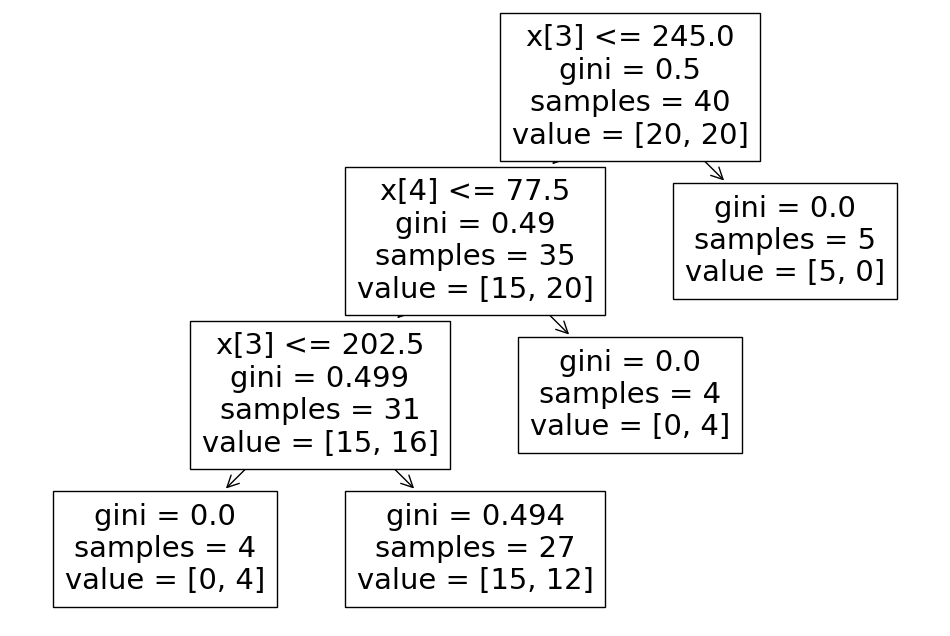

In [18]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [19]:
y_pred_gini = clf_gini.predict(x_test)

In [20]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [28]:
print("gini model accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))
print("training set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train_gini)))

gini model accuracy : 0.7000
training set accuracy score: 0.7000


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [23]:
cm = confusion_matrix(y_test, y_pred_gini)
print("confusion matrix\n\n", cm)

confusion matrix

 [[5 0]
 [3 2]]


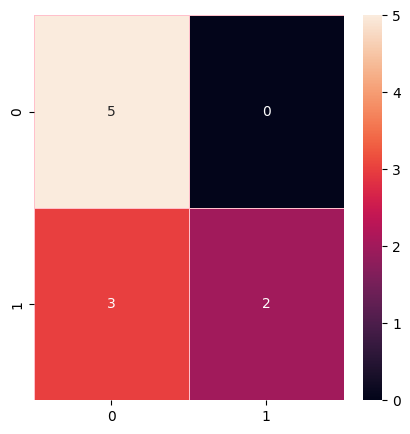

<Figure size 640x480 with 0 Axes>

In [27]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="pink", fmt=".0f", ax=ax)
plt.show()
plt.savefig("confusion matrix")

In [25]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



In [26]:
f1_score= f1_score(y_test, y_pred_gini)
print("f1 score", f1_score)

f1 score 0.5714285714285715
